# Post-Processing
***


Firstly we need to load out solution displacement field.

In [18]:
import numpy as np
path = open('./Solution/U_field_0.0.csv')
path_2 = open("/home/scottlevie/newPythonSolver/python_fv_csm/solver/savedVariables/U_field_0.0.csv")

U = np.loadtxt(path, delimiter=",")
U_2 = np.loadtxt(path_2, delimiter=",")

### Plot y-deflection in the x-direction

Firstly lets plot the deflection in the y-direction ($v$) as a function of x.

In [19]:
nx, ny = 40, 4

Lx, Ly = 2, 0.1

x_displacement_vector = np.zeros(nx+2)
y_displacement_vector = np.zeros(ny+2)


# First value is equal to 0
x_displacement_vector[0] = 0
y_displacement_vector[0] = 0


# Last value is equal to Lx
x_displacement_vector[nx+1] = Lx
y_displacement_vector[ny+1] = Ly

# Cell centre values
x_displacement_vector[1:nx+1] = np.arange((Lx/nx)/2, Lx , Lx/nx)
y_displacement_vector[1:ny+1] = np.arange((Ly/ny)/2, Ly , Ly/ny)

U_reshape_x = U[:,0].reshape(ny+2, nx+2)
U_reshape_y = U[:,1].reshape(ny+2, nx+2)

In [20]:
# y-Deflection for y = 0
y_deflection = U_reshape_y[0,:]

Text(0, 0.5, 'y-deflection (m)')

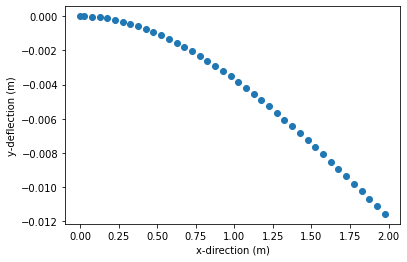

In [21]:
from matplotlib import pyplot as plt

plt.scatter(x_displacement_vector[0:41], y_deflection[0:41])
plt.xlabel("x-direction (m)")
plt.ylabel("y-deflection (m)")

# Strain field

$$\epsilon _{xx} = \frac{du}{dx}$$
$$\epsilon _{yy} = \frac{dv}{dy}$$

In [22]:
dx = Lx/nx
dy = Ly/ny

epsilon_xx = U_reshape_x/dx
epsilon_yy = U_reshape_y/dy

dispx, dispy = np.meshgrid(x_displacement_vector, y_displacement_vector)

## Stress field

$$
\boldsymbol{\sigma} =
\begin{bmatrix}
(2\mu + \lambda)\dfrac{\delta u}{\delta x} + \lambda\dfrac{\delta v}{\delta y}
&
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\\
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
&
(2\mu + \lambda)\dfrac{\delta v}{\delta y} + \lambda\dfrac{\delta u}{\delta x}
\end{bmatrix}
$$


In [23]:
from ipynb.fs.full._03_Internal_Cells import mu, _lambda

sigma_xx = (2*mu + _lambda)*(U_reshape_x/dx) + _lambda*(U_reshape_y/dy)
sigma_yy = (2*mu + _lambda)*(U_reshape_y/dy) + _lambda*(U_reshape_x/dx)
sigma_xy = mu*(U_reshape_x/dy + U_reshape_y/dx)

Text(0, 0.5, 'y (m)')

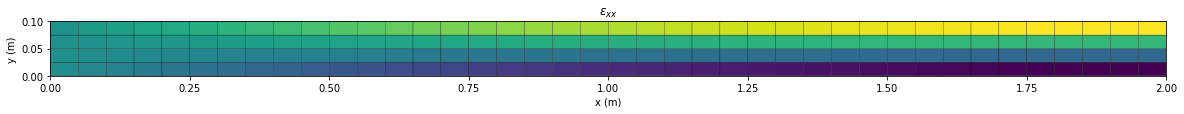

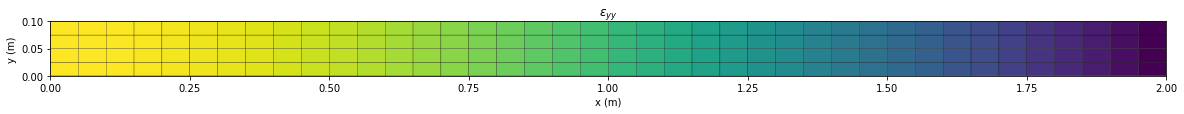

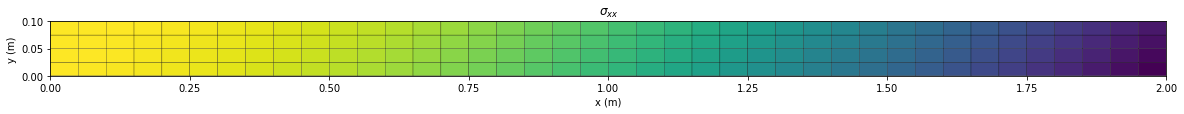

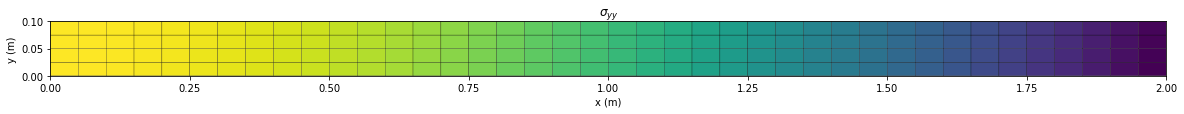

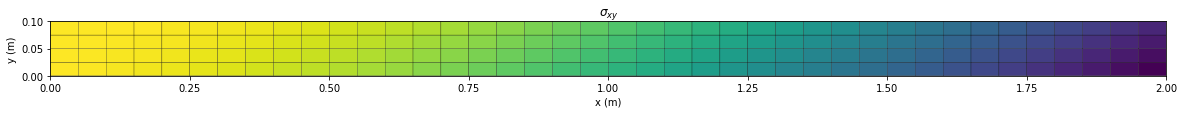

In [24]:
dispx_cell = dispx[1:ny+1, 1:nx+1]
dispy_cell = dispy[1:ny+1, 1:nx+1]
epsilon_xx_cell = epsilon_xx[1:ny+1, 1:nx+1]
epsilon_yy_cell = epsilon_yy[1:ny+1, 1:nx+1]
sigma_xx_cell = sigma_xx[1:ny+1, 1:nx+1]
sigma_yy_cell = sigma_yy[1:ny+1, 1:nx+1]
sigma_xy_cell = sigma_xy[1:ny+1, 1:nx+1]


plt.figure(figsize=(Lx*10, Ly*10))
plt.pcolor(dispx_cell, dispy_cell, epsilon_xx_cell, edgecolors = "k" )
plt.title("$\epsilon _{xx}$")
plt.xlabel("x (m)")
plt.ylabel("y (m)")

plt.figure(figsize=(Lx*10, Ly*10))
plt.pcolor(dispx_cell, dispy_cell, epsilon_yy_cell, edgecolors = "k" )
plt.title("$\epsilon _{yy}$")
plt.xlabel("x (m)")
plt.ylabel("y (m)")

plt.figure(figsize=(Lx*10, Ly*10))
plt.pcolor(dispx_cell, dispy_cell, sigma_xx_cell, edgecolors = "k" )
plt.title("$\sigma _{xx}$")
plt.xlabel("x (m)")
plt.ylabel("y (m)")

plt.figure(figsize=(Lx*10, Ly*10))
plt.pcolor(dispx_cell, dispy_cell, sigma_yy_cell, edgecolors = "k" )
plt.title("$\sigma _{yy}$")
plt.xlabel("x (m)")
plt.ylabel("y (m)")

plt.figure(figsize=(Lx*10, Ly*10))
plt.pcolor(dispx_cell, dispy_cell, sigma_xy_cell, edgecolors = "k" )
plt.title("$\sigma _{xy}$")
plt.xlabel("x (m)")
plt.ylabel("y (m)")


In [25]:
import math

In [26]:
from matplotlib import pyplot as plt



In [27]:
class postProcessing():

    def __init__(self, path, nx, ny, Lx, Ly):

        self.dx = Lx/nx
        self.dy = Ly/ny

        file = open(path)
        U = np.loadtxt(file, delimiter=",")

        self.x_displacement_vector = np.zeros(nx+2)
        self.y_displacement_vector = np.zeros(ny+2)

        # First value is equal to 0
        self.x_displacement_vector[0] = 0
        self.y_displacement_vector[0] = 0

        # Last value is equal to Lx
        self.x_displacement_vector[nx+1] = Lx
        self.y_displacement_vector[ny+1] = Ly

        # Cell centre values
        self.x_displacement_vector[1:nx+1] = np.arange((Lx/nx)/2, Lx , Lx/nx)
        self.y_displacement_vector[1:ny+1] = np.arange((Ly/ny)/2, Ly , Ly/ny)

        self.U_reshape_x = U[:,0].reshape(ny+2, nx+2)
        self.U_reshape_y = U[:,1].reshape(ny+2, nx+2)

        dispx, dispy = np.meshgrid(self.x_displacement_vector, self.y_displacement_vector)

        self.dispx_cell = dispx[1:ny+1, 1:nx+1]
        self.dispy_cell = dispy[1:ny+1, 1:nx+1]


    def yDeflection(self):

        y_deflection = self.U_reshape_y[0,:]

        plt.scatter(self.x_displacement_vector[0:nx+1], y_deflection[0:nx+1])
        plt.xlabel("x-direction (m)")
        plt.ylabel("y-deflection (m)")

    def epsilonGraph(self):

        epsilon_xx = self.U_reshape_x/self.dx
        epsilon_yy = self.U_reshape_y/self.dy

        epsilon_xx_cell = epsilon_xx[1:ny+1, 1:nx+1]
        epsilon_yy_cell = epsilon_yy[1:ny+1, 1:nx+1]

        plt.figure(figsize=(Lx*10, Ly*10))
        plt.pcolor(self.dispx_cell, self.dispy_cell, epsilon_xx_cell, edgecolors = "k" )
        plt.title("$\epsilon _{xx}$")
        plt.xlabel("x (m)")
        plt.ylabel("y (m)")
        plt.colorbar()
        plt.show()

        plt.figure(figsize=(Lx*10, Ly*10))
        plt.pcolor(self.dispx_cell, self.dispy_cell, epsilon_yy_cell, edgecolors = "k" )
        plt.title("$\epsilon _{yy}$")
        plt.xlabel("x (m)")
        plt.ylabel("y (m)")
        plt.colorbar()
        plt.show()

    def sigmaGraph(self, mu, _lambda):

        sigma_xx = (2*mu + _lambda)*(self.U_reshape_x/self.dx) + _lambda*(self.U_reshape_y/self.dy)
        sigma_yy = (2*mu + _lambda)*(self.U_reshape_y/self.dy) + _lambda*(self.U_reshape_x/self.dx)
        sigma_xy = mu*(self.U_reshape_x/self.dy + self.U_reshape_y/self.dx)

        # Initialise sigma_v
        sigma_v = sigma_xx

        # Getting error as inside the sqrt bracket some values are negative

        # for i in np.arange(0,len(sigma_v[0,:])):
        #     for j in np.arange(0,len(sigma_v[:,0])):
        #         print(i), print(j), print("\n")
        #         print(sigma_xx[i,j]**2 - (sigma_xx[i,j]+sigma_yy[i,j]) + sigma_yy[i,j]**2 + 3*(sigma_xy[i,j]**2))
        #         print((sigma_xx[i,j]+sigma_yy[i,j]))

        #         sigma_v[i,j] = math.sqrt(sigma_xx[i,j]**2 - (sigma_xx[i,j]+sigma_yy[i,j]) + sigma_yy[i,j]**2 + 3*(sigma_xy[i,j]**2))


        
        # # sigma_v = math.sqrt(sigma_xx**2 - (sigma_xx+sigma_yy) + sigma_yy**2 + 3*(sigma_xy**2))
        # sigma_v = sigma_xx
        # for i in sigma_v:
        #     math.sqrt(sigma_xx[i,j]**2 - (sigma_xx[i,j]+sigma_yy[i,j]) + sigma_yy[i,j]**2 + 3*(sigma_xy**2))

        

        sigma_xx_cell = sigma_xx[1:ny+1, 1:nx+1]
        sigma_yy_cell = sigma_yy[1:ny+1, 1:nx+1]
        sigma_xy_cell = sigma_xy[1:ny+1, 1:nx+1]
        sigma_v_cell = sigma_v[1:ny+1, 1:nx+1]

        plt.figure(figsize=(Lx*10, Ly*10))
        plt.pcolor(self.dispx_cell, self.dispy_cell, sigma_xx_cell, edgecolors = "k" )
        plt.title("$\sigma _{xx}$")
        plt.xlabel("x (m)")
        plt.ylabel("y (m)")
        plt.colorbar()
        plt.show()

        plt.figure(figsize=(Lx*10, Ly*10))
        plt.pcolor(self.dispx_cell, self.dispy_cell, sigma_yy_cell, edgecolors = "k" )
        plt.title("$\sigma _{yy}$")
        plt.xlabel("x (m)")
        plt.ylabel("y (m)")
        plt.colorbar()
        plt.show()

        plt.figure(figsize=(Lx*10, Ly*10))
        plt.pcolor(self.dispx_cell, self.dispy_cell, sigma_xy_cell, edgecolors = "k" )
        plt.title("$\sigma _{xy}$")
        plt.xlabel("x (m)")
        plt.ylabel("y (m)")
        plt.colorbar()
        plt.show()

        # plt.figure(figsize=(Lx*10, Ly*10))
        # plt.pcolor(self.dispx_cell, self.dispy_cell, sigma_v_cell, edgecolors = "k" )
        # plt.title("$\sigma _{v}$")
        # plt.xlabel("x (m)")
        # plt.ylabel("y (m)")
        # plt.colorbar()
        # plt.show()




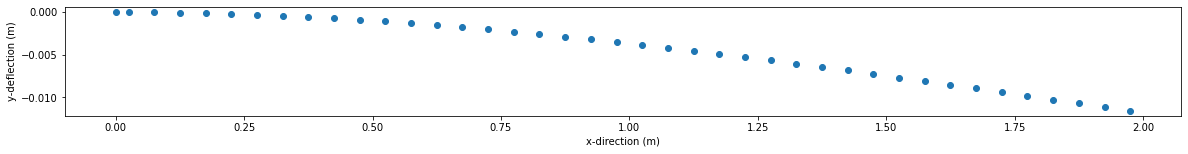

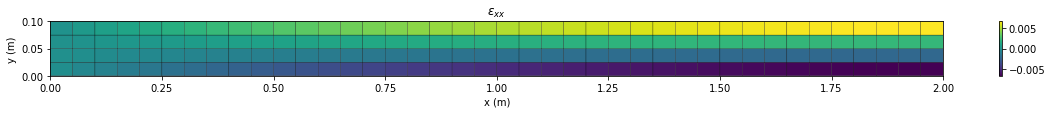

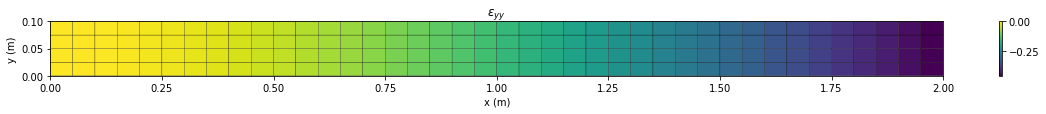

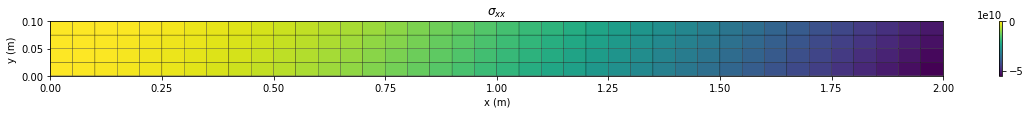

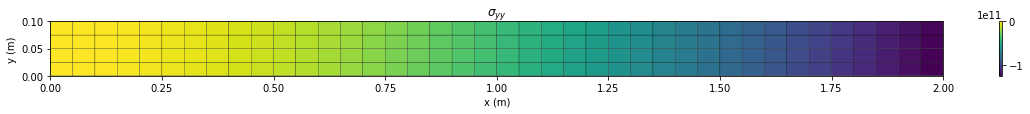

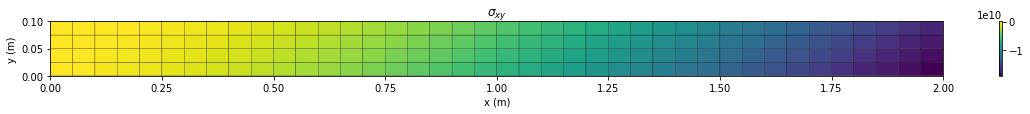

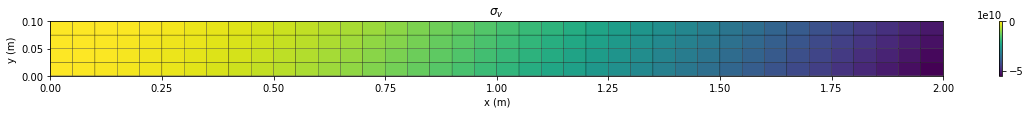

In [28]:
filepath = './Solution/U_field_0.0.csv'
nx, ny, Lx, Ly = 40, 4, 2, 0.1

postProcessing(filepath, nx, ny, Lx, Ly).yDeflection()
postProcessing(filepath, nx, ny, Lx, Ly).epsilonGraph()
postProcessing(filepath, nx, ny, Lx, Ly).sigmaGraph(mu, _lambda)

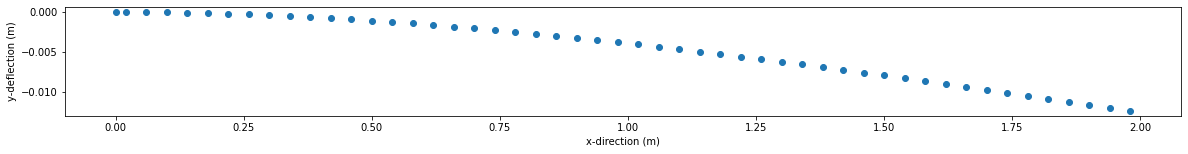

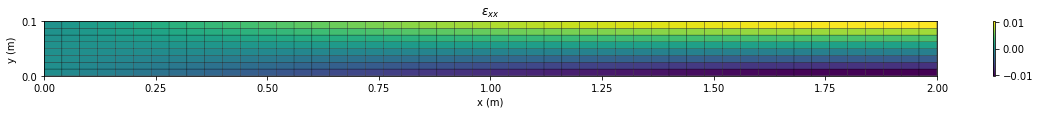

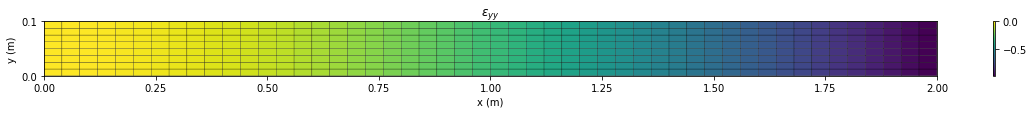

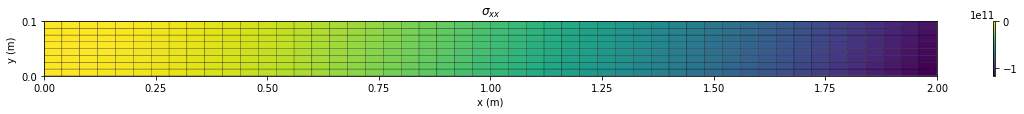

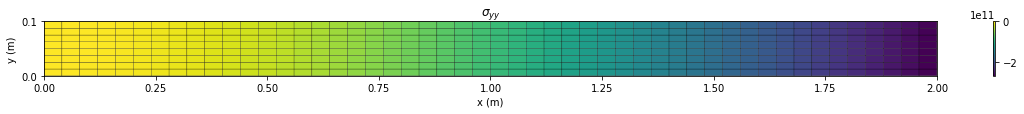

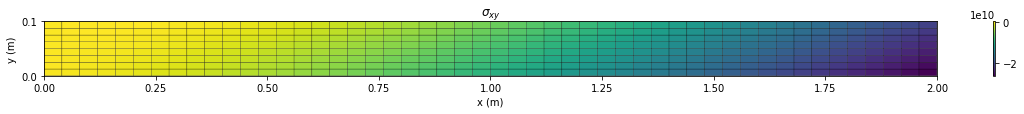

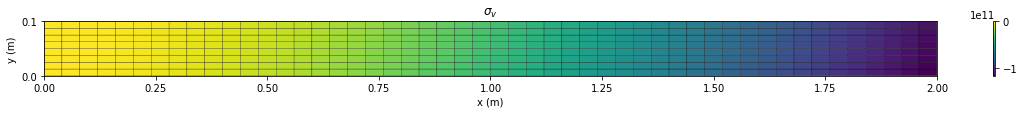

In [14]:
filepath = '/home/scottlevie/newPythonSolver/python_fv_csm/solver/savedVariables/U_field_0.0_50_8.csv'
nx, ny = 50, 8

postProcessing(filepath, nx, ny, Lx, Ly).yDeflection()
postProcessing(filepath, nx, ny, Lx, Ly).epsilonGraph()
postProcessing(filepath, nx, ny, Lx, Ly).sigmaGraph(mu, _lambda)

In [15]:
sigma_xx.shape

(6, 42)

Text(0, 0.5, 'y (m)')

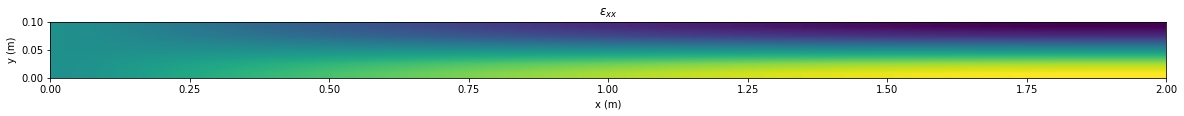

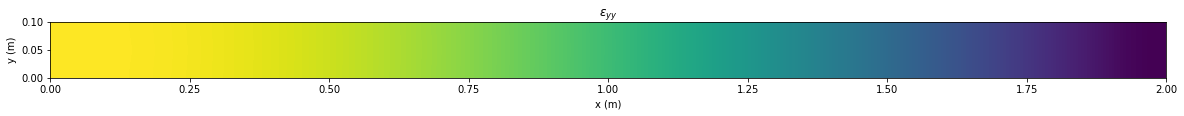

In [16]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(Lx*10, Ly*50))
plt.title("$\epsilon _{xx}$")
plt.imshow(epsilon_xx, extent=[np.min(dispx),np.max(dispx),np.min(dispy),np.max(dispy)], interpolation='bilinear')
plt.xlabel("x (m)")
plt.ylabel("y (m)")

plt.figure(figsize=(Lx*10, Ly*50))
plt.title("$\epsilon _{yy}$")
plt.imshow(epsilon_yy, extent=[np.min(dispx),np.max(dispx),np.min(dispy),np.max(dispy)], interpolation='bilinear')
plt.xlabel("x (m)")
plt.ylabel("y (m)")

Text(0, 0.5, 'y (m)')

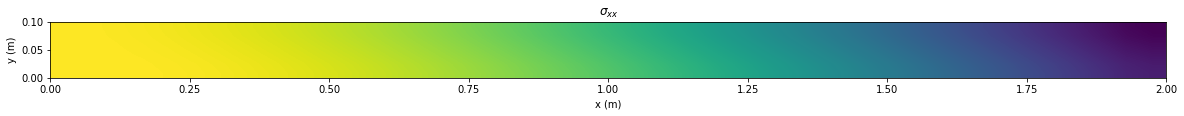

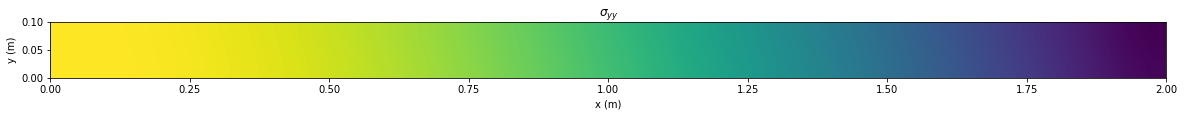

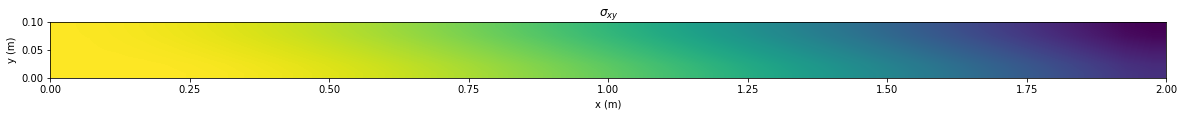

In [17]:
plt.figure(figsize=(Lx*10, Ly*50))
plt.title("$\sigma _{xx}$")
plt.imshow(sigma_xx, extent=[np.min(dispx),np.max(dispx),np.min(dispy),np.max(dispy)], interpolation='bilinear')
plt.xlabel("x (m)")
plt.ylabel("y (m)")

plt.figure(figsize=(Lx*10, Ly*50))
plt.title("$\sigma _{yy}$")
plt.imshow(sigma_yy, extent=[np.min(dispx),np.max(dispx),np.min(dispy),np.max(dispy)], interpolation='bilinear')
plt.xlabel("x (m)")
plt.ylabel("y (m)")

plt.figure(figsize=(Lx*10, Ly*50))
plt.title("$\sigma _{xy}$")
plt.imshow(sigma_xy, extent=[np.min(dispx),np.max(dispx),np.min(dispy),np.max(dispy)], interpolation='bilinear')
plt.xlabel("x (m)")
plt.ylabel("y (m)")